## Sound classification with convolutional networks and fast ai

### 1. Download and extract audio data

In [1]:
!wget https://goo.gl/8hY5ER
!tar xf 8hY5ER

--2025-10-24 18:43:12--  https://goo.gl/8hY5ER
Auflösen des Hostnamens goo.gl (goo.gl) … 2a00:1450:4001:813::200e, 142.250.185.238
Verbindungsaufbau zu goo.gl (goo.gl)|2a00:1450:4001:813::200e|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 302 Found
Platz: https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz [folgend]
--2025-10-24 18:43:12--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Auflösen des Hostnamens zenodo.org (zenodo.org) … 2001:1458:d00:25::100:372, 2001:1458:d00:61::100:2f3, 2001:1458:d00:24::100:f6, ...
Verbindungsaufbau zu zenodo.org (zenodo.org)|2001:1458:d00:25::100:372|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 504 Gateway Time-out
Erneuter Versuch.

--2025-10-24 18:43:43--  (Versuch: 2)  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Verbindungsaufbau zu zenodo.org (zenodo.org)|2001:1458:d00:25::100:372|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 3

In [1]:
import IPython
IPython.display.Audio("UrbanSound8K/audio/fold1/26270-9-0-35.wav")

### 2. Process the data and create spectrograms

In [1]:
labels  = ['air_conditioner','car_horn','children_playing',
           'dog_bark','drilling','engine_idling','gun_shot','jackhammer','siren','street_music']


In [6]:
!mkdir 'UrbanSound8K/spectrogram'

mkdir: das Verzeichnis »UrbanSound8K/spectrogram“ kann nicht angelegt werden: Die Datei existiert bereits


In [7]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram # Convert data to Spectogram
import librosa # https://librosa.org/doc/latest/index.html
import numpy as np
from pathlib import Path
import os
import librosa.display
import gc

gc.enable()

def create_fold_spectrograms(fold):
    gc.collect()
    spectrogram_path = Path('UrbanSound8K/spectrogram/')  
    audio_path = Path('UrbanSound8K/audio/')  
    print(f'Processing fold {fold}')
    os.mkdir(spectrogram_path/fold)
    for audio_file in list(Path(audio_path/f'fold{fold}').glob('*.wav')):
        samples, sample_rate = librosa.load(audio_file) #loads and decodes the audio to time series samples
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        filename  = spectrogram_path/fold/Path(audio_file).name.replace('.wav','.png')
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close('all')


In [9]:
# Erstelle dir Bilder

for i in range(1, 11):
    create_fold_spectrograms(str(i))

Create ImageNet style directory structure for each of the folds for easy data loadin

In [12]:
!mkdir 'UrbanSound8K/data'

In [13]:
# --- KORRIGIERTE DATENVORBEREITUNG (SPEKTROGRAMME WERDEN DIREKT IN KATEGORIE/FOLD-STRUKTUR ERSTELLT) ---

def create_fold_spectrograms_corrected(fold):
    gc.collect()
    audio_path = Path('UrbanSound8K/audio/')  
    data_path = Path('UrbanSound8K/data')
    
    # Sicherstellen, dass der Fold-Ordner in data_path existiert
    Path(data_path/f'fold{fold}').mkdir(exist_ok=True)
    
    print(f'Processing fold {fold}')
    
    for audio_file in list(Path(audio_path/f'fold{fold}').glob('*.wav')):
        
        # 1. Bestimme die Kategorie und erstelle den Kategorie-Ordner
        # Beispiel: 26270-9-0-35.wav -> Label Index 9 -> 'siren'
        label_index = int(audio_file.name.split('-')[1])
        label = labels[label_index]
        
        # Endziel: UrbanSound8K/data/fold1/siren/26270-9-0-35.png
        Path(data_path/f'fold{fold}'/label).mkdir(exist_ok=True)
        
        # 2. Spektrogramm-Erstellung
        samples, sample_rate = librosa.load(audio_file)
        fig = plt.figure(figsize=[0.72,0.72])
        ax = fig.add_subplot(111)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        ax.set_frame_on(False)
        
        filename = data_path/f'fold{fold}'/label/audio_file.name.replace('.wav','.png')
        
        S = librosa.feature.melspectrogram(y=samples, sr=sample_rate)
        librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
        plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
        plt.close(fig) # Nur 'fig' schließen, nicht 'all'
        
# Erstelle dir Bilder (Kopieren entfällt)
for i in range(1, 11):
    create_fold_spectrograms_corrected(str(i))

Processing fold 1


/home/lukelo/miniconda3/envs/cruger/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
/home/lukelo/miniconda3/envs/cruger/lib/python3.10/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(


Processing fold 2
Processing fold 3
Processing fold 4
Processing fold 5
Processing fold 6
Processing fold 7
Processing fold 8
Processing fold 9
Processing fold 10


In [4]:
import torch
# Führen Sie diesen Block aus, um die Funktionen bereitzustellen

from fastai.vision.all import * 
import gc
import numpy as np

# --- GLOBALE KONSTANTEN ---
# Stellen Sie sicher, dass diese Konstanten existieren
data_directory = Path('UrbanSound8K/data') 
BATCH_SIZE = 64
IMAGE_SIZE = 224

# --- KORRIGIERTER SPLITTER ---
def UrbanSoundSplitter(fold_num):
    """Generiert eine fastai-Splitter-Funktion für einen bestimmten Fold."""
    def _inner(items):
        valid_idxs = []
        train_idxs = []
        fold_string = f'fold{fold_num}'
        
        for idx, item_path in enumerate(items):
            # KORREKTUR: item_path.parent.name ist 'category', 
            # item_path.parent.parent.name ist 'foldN'
            # Wir suchen den Fold-Namen im Großeltern-Ordner.
            if fold_string in item_path.parent.parent.name: 
                valid_idxs.append(idx)
            else:
                train_idxs.append(idx)
        
        return train_idxs, valid_idxs
    return _inner

# --- FUNKTION ZUR DURCHFÜHRUNG EINES EINZELNEN FOLDS ---
def process_fold(fold_num):
    """Führt das Training und die Validierung für einen einzelnen Fold durch."""
    gc.collect()
    all_files = get_image_files(data_directory)
    
    dls = DataBlock(
        blocks=(ImageBlock, CategoryBlock),
        get_y=parent_label,  # Holt die Kategorie (z.B. 'siren')
        splitter=UrbanSoundSplitter(fold_num), # Holt den Fold (z.B. 'fold1')
        item_tfms=Resize(IMAGE_SIZE),
        batch_tfms=Normalize.from_stats(*imagenet_stats)
    ).dataloaders(all_files, bs=BATCH_SIZE) 

    learn = vision_learner(dls, resnet34, metrics=error_rate)
    
    print(f"Starte Training für Fold {fold_num}...")
    
    # Training
    learn.fit_one_cycle(3)
    learn.unfreeze()
    learn.fit_one_cycle(1)
    learn.fit_one_cycle(3, lr_max=slice(1e-6,1e-4)) 
    
    loss, err_rate = learn.validate() 
# Führen Sie diesen Block aus, um die Funktionen bereitzustellen

# --- NEU: MODELL EXPORTIEREN ---
    model_name = f'resnet34_fold_{fold_num}.pkl'
    # Speichert den Zustand des Modells am Ende des Trainings
    learn.export(model_name) 
    
    # Speicherbereinigung
    del learn
    torch.cuda.empty_cache()
    
    # Wir geben sowohl die Fehlerrate als auch den Dateinamen zurück
    return err_rate, model_name # <--- ZWEI WERTE WERDEN JETZT ZURÜCKGEGEBEN

Starte Datenprüfung und Visualisierung...
Gesamtzahl gefundener Dateien: 8732
Elemente im Validierungssatz (Fold 1): 1710

Visualisierung beendet. Siehe Bilder oben. Nun ist der Haupt-Loop bereit.


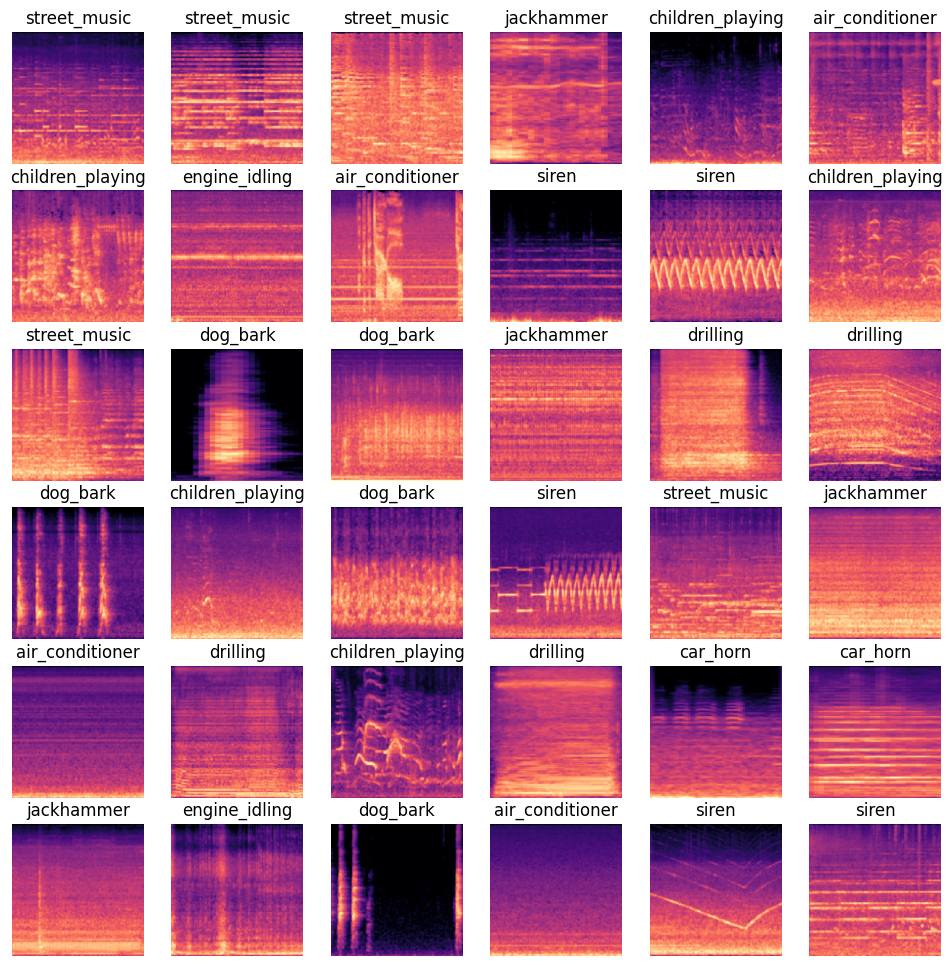

In [5]:
# ... (Ihre UrbanSoundSplitter Definition muss auch ausgeführt werden) ...

# --- VISUALISIERUNG UND PRÜFUNG DER DATEN ---

print("Starte Datenprüfung und Visualisierung...")

# 1. Alle Dateipfade finden
all_files = get_image_files(data_directory) 

# 2. DataLoaders mit Fold 1 als Validierung erstellen (nur zur Ansicht)
test_dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_y=parent_label, 
    splitter=UrbanSoundSplitter(1), 
    item_tfms=Resize(IMAGE_SIZE),
    batch_tfms=Normalize.from_stats(*imagenet_stats)
).dataloaders(all_files, bs=BATCH_SIZE) 

# PRÜFUNG: Die Anzahl der Validierungselemente MUSS > 0 sein.
valid_count = len(test_dls.valid_ds)
print(f"Gesamtzahl gefundener Dateien: {len(all_files)}")
print(f"Elemente im Validierungssatz (Fold 1): {valid_count}")

if valid_count > 0:
    # 3. PLOT ERSTELLEN
    test_dls.show_batch(max_n=36, ncols=6, figsize=(12, 12), cmap='viridis') 
    print("\nVisualisierung beendet. Siehe Bilder oben. Nun ist der Haupt-Loop bereit.")
else:
    print("\n🚨 FEHLER: Der Validierungssatz ist immer noch leer. Bitte überprüfen Sie die Ordnerstruktur und den Pfad in der Funktion 'UrbanSoundSplitter'.")

In [6]:
# --- HAUPT-LOOP ZUR DURCHFÜHRUNG DER KREUZVALIDIERUNG (KORRIGIERT) ---
final_scores = []
best_error_rate = float('inf')
best_model_file = None

for i in range(1, 11): 
    fold_name = f'fold{i}'
    print(f'\n{"="*60}')
    print(f'Processing Fold {fold_name}')
    print(f'{"="*60}')
    
    # 🚨 Fängt ZWEI Rückgabewerte ab
    error_rate_score, model_filename = process_fold(i) 
    
    final_scores.append(error_rate_score)
    
    # --- NEU: BESTEN FOLD SPEICHERN ---
    if error_rate_score < best_error_rate:
        best_error_rate = error_rate_score
        best_model_file = model_filename
        
        # Umbenennen in einen generischen Namen wie 'best_model.pkl' zur einfachen Nutzung
        # (optional, aber nützlich)
        if Path('best_model.pkl').exists():
            os.remove('best_model.pkl')
        os.rename(best_model_file, 'best_model.pkl')
        print(f"-> NEUER BESTER FOLD gefunden. Modell als 'best_model.pkl' gespeichert.")

    print(f'-> Fold {fold_name} Error Rate: {error_rate_score:.4f}')
    print(f'-> Fold {fold_name} Accuracy: {(1 - error_rate_score):.4f}')
    print('-'*50)

# --- ENDERGEBNIS BERECHNEN ---
avg_error_rate = np.mean(final_scores)
print(f"\n{'#'*70}")
print(f"🏆 DURCHSCHNITTLICHE ERGEBNISSE ÜBER 10 FOLDS (Finales Ergebnis)")
print(f"🏆 Durchschnittliche Error Rate: {avg_error_rate:.4f}")
print(f"🏆 Durchschnittliche Accuracy: {(1 - avg_error_rate):.4f}")
print(f"🎉 Der beste Fold ({best_model_file.replace('_fold_', 'Fold ').replace('.pkl', '')}) wurde als 'best_model.pkl' gespeichert.")
print(f"{'#'*70}")


Processing Fold fold1
Starte Training für Fold 1...


epoch,train_loss,valid_loss,error_rate,time
0,1.533421,0.913707,0.284795,00:44
1,0.746468,0.886751,0.253801,00:21
2,0.508779,0.880801,0.243275,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.539826,0.697100,0.198246,00:42


epoch,train_loss,valid_loss,error_rate,time
0,0.247117,0.701297,0.195906,00:31
1,0.207319,0.714090,0.191228,00:31
2,0.175611,0.738192,0.190643,00:31


-> NEUER BESTER FOLD gefunden. Modell als 'best_model.pkl' gespeichert.
-> Fold fold1 Error Rate: 0.1906
-> Fold fold1 Accuracy: 0.8094
--------------------------------------------------

Processing Fold fold2
Starte Training für Fold 2...


epoch,train_loss,valid_loss,error_rate,time
0,1.423483,1.147878,0.328829,00:24
1,0.722907,1.071914,0.309685,00:24
2,0.501912,1.038538,0.297297,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.547411,0.845048,0.233108,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.269419,0.766732,0.219595,00:33
1,0.238276,0.753172,0.213964,00:33
2,0.204545,0.749484,0.212838,00:33


-> Fold fold2 Error Rate: 0.2128
-> Fold fold2 Accuracy: 0.7872
--------------------------------------------------

Processing Fold fold3
Starte Training für Fold 3...


epoch,train_loss,valid_loss,error_rate,time
0,1.455652,1.126701,0.366486,00:24
1,0.713953,0.889210,0.284324,00:24
2,0.482044,0.955313,0.311351,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.536065,1.018499,0.272432,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.281368,1.071473,0.277838,00:33
1,0.234218,0.994652,0.274595,00:33
2,0.201594,1.007009,0.263784,00:33


-> Fold fold3 Error Rate: 0.2638
-> Fold fold3 Accuracy: 0.7362
--------------------------------------------------

Processing Fold fold4
Starte Training für Fold 4...


epoch,train_loss,valid_loss,error_rate,time
0,1.491175,1.144183,0.385859,00:24
1,0.755515,1.009237,0.310101,00:24
2,0.496679,1.027241,0.322222,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.549901,0.755310,0.232323,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.274989,0.708635,0.227273,00:33
1,0.230844,0.669481,0.210101,00:33
2,0.199027,0.685130,0.209091,00:33


-> Fold fold4 Error Rate: 0.2091
-> Fold fold4 Accuracy: 0.7909
--------------------------------------------------

Processing Fold fold5
Starte Training für Fold 5...


epoch,train_loss,valid_loss,error_rate,time
0,1.469979,0.782963,0.272436,00:24
1,0.742045,0.583497,0.212607,00:24
2,0.506831,0.551959,0.182692,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.504713,0.395639,0.131410,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.252765,0.379234,0.119658,00:33
1,0.195515,0.347041,0.100427,00:33
2,0.171809,0.362065,0.104701,00:33


-> NEUER BESTER FOLD gefunden. Modell als 'best_model.pkl' gespeichert.
-> Fold fold5 Error Rate: 0.1047
-> Fold fold5 Accuracy: 0.8953
--------------------------------------------------

Processing Fold fold6
Starte Training für Fold 6...


epoch,train_loss,valid_loss,error_rate,time
0,1.426675,1.316695,0.359660,00:25
1,0.717422,1.285335,0.318348,00:25
2,0.459463,1.265848,0.307412,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.521383,0.928373,0.253949,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.267565,0.924143,0.236938,00:34
1,0.229279,0.907821,0.222357,00:34
2,0.228524,0.873452,0.221142,00:34


-> Fold fold6 Error Rate: 0.2211
-> Fold fold6 Accuracy: 0.7789
--------------------------------------------------

Processing Fold fold7
Starte Training für Fold 7...


epoch,train_loss,valid_loss,error_rate,time
0,1.447107,1.136730,0.349642,00:24
1,0.716871,1.087951,0.294749,00:24
2,0.486345,1.047209,0.287589,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.512340,0.501508,0.170644,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.243921,0.515027,0.158711,00:33
1,0.209033,0.520136,0.157518,00:33
2,0.194997,0.517982,0.161098,00:33


-> Fold fold7 Error Rate: 0.1611
-> Fold fold7 Accuracy: 0.8389
--------------------------------------------------

Processing Fold fold8
Starte Training für Fold 8...


epoch,train_loss,valid_loss,error_rate,time
0,1.425203,1.320597,0.336228,00:24
1,0.722842,1.205172,0.284119,00:23
2,0.495809,1.172941,0.299007,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.529710,1.230309,0.281638,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.271610,1.184324,0.264268,00:33
1,0.224978,1.240011,0.254342,00:33
2,0.192202,1.243725,0.251861,00:33


-> Fold fold8 Error Rate: 0.2519
-> Fold fold8 Accuracy: 0.7481
--------------------------------------------------

Processing Fold fold9
Starte Training für Fold 9...


epoch,train_loss,valid_loss,error_rate,time
0,1.454962,0.926800,0.263480,00:24
1,0.719373,0.877787,0.227941,00:24
2,0.473775,0.869802,0.225490,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.495570,0.611976,0.159314,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.250000,0.634276,0.154412,00:33
1,0.203139,0.646437,0.154412,00:33
2,0.183322,0.667140,0.161765,00:33


-> Fold fold9 Error Rate: 0.1618
-> Fold fold9 Accuracy: 0.8382
--------------------------------------------------

Processing Fold fold10
Starte Training für Fold 10...


epoch,train_loss,valid_loss,error_rate,time
0,1.471287,0.968740,0.261649,00:24
1,0.707881,0.884452,0.227001,00:24
2,0.480986,0.899832,0.222222,00:25


epoch,train_loss,valid_loss,error_rate,time
0,0.530992,0.510535,0.160096,00:34


epoch,train_loss,valid_loss,error_rate,time
0,0.256910,0.503172,0.155317,00:34
1,0.227156,0.487197,0.142174,00:34
2,0.203523,0.498513,0.142174,00:34


-> Fold fold10 Error Rate: 0.1422
-> Fold fold10 Accuracy: 0.8578
--------------------------------------------------

######################################################################
🏆 DURCHSCHNITTLICHE ERGEBNISSE ÜBER 10 FOLDS (Finales Ergebnis)
🏆 Durchschnittliche Error Rate: 0.1919
🏆 Durchschnittliche Accuracy: 0.8081
🎉 Der beste Fold (resnet34Fold 5) wurde als 'best_model.pkl' gespeichert.
######################################################################
